# Evaluate simple linear regression

## Introduction

In this activity, you will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, you will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.


## Step 1: Imports

### Import packages

In [2]:
# Import pandas, pyplot from matplotlib, and seaborn.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Import the statsmodel module and the ols function


In [3]:
# Import the statsmodel module.

# Import the ols function from statsmodels.

import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load the dataset

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###
data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.

data.head()

TV      Radio  Social_Media       Sales
0  16.0   6.566231      2.907983   54.732757
1  13.0   9.237765      2.409567   46.677897
2  41.0  15.886446      2.913410  150.177829
3  83.0  30.020028      6.922304  298.246340
4  15.0   8.437408      1.405998   56.594181

## Step 2: Data exploration

**Question:** What are some reasons for conducting an EDA before constructing a simple linear regression model?

Potential reasons include:

* Understanding which variables are present in the data
* Reviewing the distribution of features, such as minimum, mean, and maximum values
* Plotting the relationship between the independent and dependent variables to visualize which feature is the best choice for X
* Identifying issues with the data, such as incorrect values (e.g., typos) or missing values

### Explore the data size

In [5]:
# Display the shape of the data as a tuple (rows, columns).

data.shape

(4572, 4)

### Explore the independent variables

In [6]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

data.describe()

TV        Radio  Social_Media        Sales
count  4562.000000  4568.000000   4566.000000  4566.000000
mean     54.066857    18.160356      3.323956   192.466602
std      26.125054     9.676958      2.212670    93.133092
min      10.000000     0.000684      0.000031    31.199409
25%      32.000000    10.525957      1.527849   112.322882
50%      53.000000    17.859513      3.055565   189.231172
75%      77.000000    25.649730      4.807558   272.507922
max     100.000000    48.871161     13.981662   364.079751

### Explore the dependent variable

In [7]:
# Calculate the average missing rate in the sales column.

missing_sales = data['Sales'].isna().sum()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal place.

missing_sales_percent = (missing_sales / len(data))*100
missing_sales_percent = round (missing_sales_percent, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).

print('The percentage of missing values in Sales column is: ' + str(missing_sales_percent) + '%')

The percentage of missing values in Sales column is: 0.13%


**Question:** What do you observe about the percentage of missing values in the `Sales` column?

The percentage of the missing values in Sales column is very small which is 0.13%

### Remove the missing data

In [8]:
# Subset the data to include rows where Sales is present.

data['Sales'].dropna()

0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4567     94.685866
4568    249.101915
4569    163.631457
4570    253.610411
4571    148.202414
Name: Sales, Length: 4566, dtype: float64

### Visualize the sales distribution

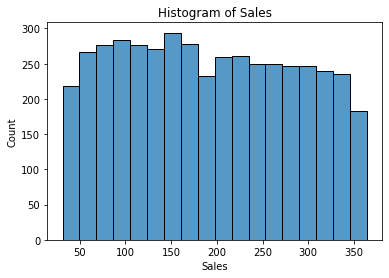

In [9]:
# Create a histogram of the Sales.

fig = sns.histplot(data['Sales'])
fig.set_xlabel("Sales")
fig.set_title("Histogram of Sales")
plt.show()

# Add a title


**Question:** What do you observe about the distribution of `Sales` from the preceding histogram?

Generally, `Sales` are equally distributed between 25 and 350 million. 

## Step 3: Model building

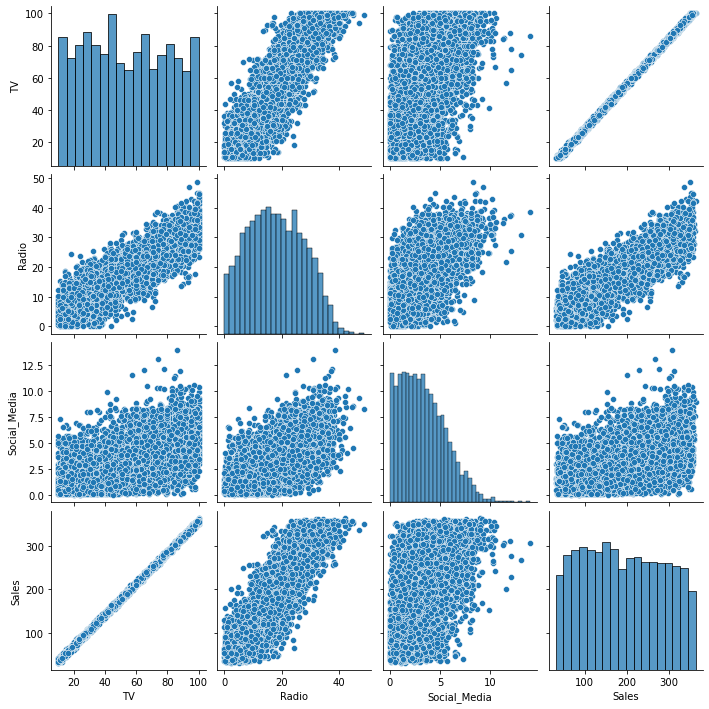

In [10]:
# Create a pairplot of the data.

sns.pairplot(data)

**Question:** Which variable did you select for X? Why?

TV because based on the pairplot, TV clearly has the strongest linear relationship with `Sales`.

### Build and fit the model

Replace the comment with the correct code. Use the variable you chose for `X` for building the model.

In [11]:
# Define the OLS formula.

ols_data=data[['Sales', 'TV']]

# Create an OLS model.

ols_formula = "Sales ~ TV"
OLS = ols(formula = ols_formula, data = ols_data)

# Fit the model.

model = OLS.fit()

# Save the results summary.
# Display the model results.

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        05:59:26   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

Create a scatterplot comparing the X variable you selected with the dependent variable.

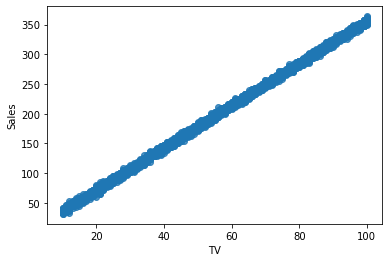

In [12]:
# Create a scatterplot comparing X and Sales (Y).

sns.regplot(x = "TV", y = "Sales", data = ols_data)

**QUESTION:** Is the linearity assumption met?

There is a clear linear relationship between `TV` and `Sales`, meeting the linearity assumption.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

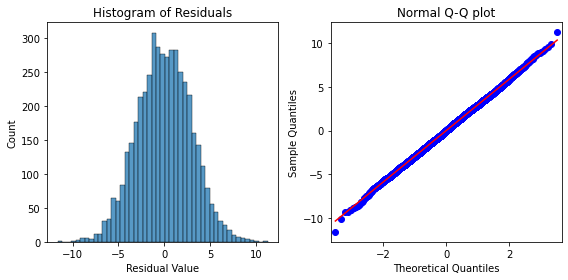

In [22]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals .

### YOUR CODE HERE ### 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()


**Question:** Is the normality assumption met?


The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model.The residuals in the Q-Q plot form a straight line, further supporting that the normality assumption is met.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

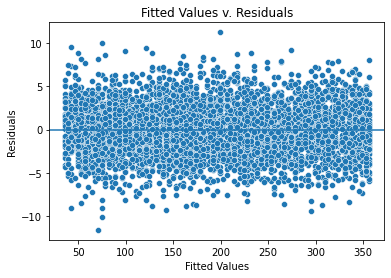

In [23]:
# Create a scatterplot with the fitted values from the model and the residuals.


fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x-axis label.
fig.set_xlabel("Fitted Values")

# Set the y-axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)

# Show the plot.
plt.show()

**QUESTION:** Is the homoscedasticity assumption met?

The variance of the residuals is consistant across all $X$. Thus, the assumption of homoscedasticity is met.

## Step 4: Results and evaluation

### Display the OLS regression results

If the linearity assumptions are met, you can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [25]:
# Display the model_results defined previously.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        05:20:00   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?


Using `TV` as X results in a simple linear regression model with $R^{2} = 0.999$. In other words, `TV` explains $99.9\%$ of the variation in `Sales`.

The R-squared value will depend on the variable selected for X. 


### Interpret the model results

With the model fit evaluated, assess the coefficient estimates and the uncertainty of these estimates.

**Question:** Based on the preceding model results, what do you observe about the coefficients?

When TV is used as the independent variable X, the coefficient for the Intercept is -0.1263 and the coefficient for TV is 3.5614.

**Question:** How would you write the relationship between X and `Sales` in the form of a linear equation?

When `TV` is used as the independent variable X, the linear equation is:

$Y = \text{Intercept} + \text{Slope} * X$

$\text{Sales (in millions)} = \text{Intercept} + \text{Slope} *\text{TV (in millions)}$

$\text{Sales (in millions)} = -0.1263 + 3.5614 * \text{TV (in millions)}$

According to the model, when `TV` is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 3.5614 million dollars more in sales.

**Question:** Why is it important to interpret the beta coefficients?

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

### Measure the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

Display the model results again.

In [26]:
# Display the model_results defined previously.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        05:26:49   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?

WHen TV is used as the independent variable, The p-value is 0.00 and the 95% Confidence Level is [3.558 , 3.565]. This means there is a 95% chance the interval [3.558,3.565] contains the true parameter value of the slope. These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact TV has on Sales.

**Question:** Based on this model, what are you interested in exploring?

Potential areas to explore include:

* Providing the business with the estimated sales given different TV promotional budgets
* Using both `TV` and `Radio` as independent variables
* Adding plots to help convey the results, such as using the `seaborn` `regplot()` to plot the data with a best fit regression line

**Question:** What recommendations would you make to the leadership at your organization?

Of the three available promotion types (TV, radio, and social media), 

- TV has the strongest positive linear relationship with sales. According to the model, an increase of one million dollars for the TV promotional budget will result in an estimated 3.5614 million dollars more in sales. This is a very confident estimate, as the p-value for this coefficient estimate is small. 

Thus, the business should prioritize increasing the TV promotional budget over the radio and social media promotional budgets to increase sales. 

## Considerations

**What are some key takeaways that you learned from this lab?**

* Exploratory data analysis can be used to find a suitable X variable for a simple linear regression model.
* It's important to check that simple linear regression assumptions are met before interpreting model results.
* R-squared is a useful measure of prediction error.
* It's important to provide measures of uncertainty (e.g., p-values, confidence intervals) with any coefficient estimates. 

**What findings would you share with others?**

* Sales is relatively equally distributed between \\$25 and \\$350 million across all promotions. 
* In the data visualization, TV has the strongest linear relationship with sales. Radio and sales appear to have a moderate linear relationship, but there is larger variance than between TV and sales. Social media and sales appear to have a weak linear relationship.
* When TV is used as the independent variable, the R-squared for the simple linear regression model estimating sales is 0.999.
* When TV is used as the independent variable, the coefficient for the intercept is -0.1263 and the coefficient for TV is 3.5614.
* When TV is used as the independent variable, the slope of the coefficient for TV has a p-value of 0.000 and a 95% confidence interval of [3.558, 3.565].


**How would you frame your findings to stakeholders?**

* Among TV, social media, and radio, TV had the strongest positive linear relationship with sales. 
* The linear regression model estimates that 99.9% of the variation in sales is explained by the TV promotional budget. In other words, nearly all of the variation in sales can be explained by the TV promotional budget alone, making TV an excellent predictor of sales.
* According to the model, when TV is used as the independent variable X, an increase of one million dollars for the TV promotional budget would result in an estimated 3.5614 million more dollars in sales. 
* The interval (3.558 million, 3.565 million) has a 95% probability of containing the true estimate of the increase in sales for a one million dollar increase in the TV promotional budget. Therefore, the estimate provided in the previous bullet is very confident.